# **CREDIT CARD FRAUD DETECTION**

### Introduction 

In [18]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from pandas.plotting import scatter_matrix
import os
#from imblearn.over_sampling import ADASYN 
from collections import Counter

# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
!unzip -uq "/content/drive/My Drive/creditcard.csv.zip" -d "/content/drive/My Drive/creditcard.csv"

unzip:  cannot find or open /content/drive/My Drive/creditcard.csv.zip, /content/drive/My Drive/creditcard.csv.zip.zip or /content/drive/My Drive/creditcard.csv.zip.ZIP.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data are not shared . Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28



---



Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



## Exploratory Data Analysis

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Handling missing values

In [ ]:
data.isnull().values.any()

False

This shows that there are no missing values in the data

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print('Genuine', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Genuine 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x ='Class', data=data, palette='colos')
plt.title('Class Distributions \n (0: Genuine|| 1: Fraud)', fontsize=14)

ValueError: colos is not a valid palette name

In [ ]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Checking the frequency of frauds

Text(0.5, 1.0, 'Class Distributions \n (0: Genuine|| 1: Fraud)')

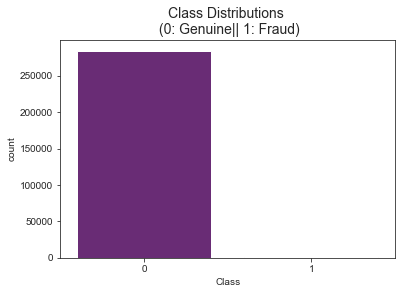

In [ ]:
sns.countplot(x ='Class', data=data, palette='magma')
plt.title('Class Distributions \n (0: Genuine|| 1: Fraud)', fontsize=14)

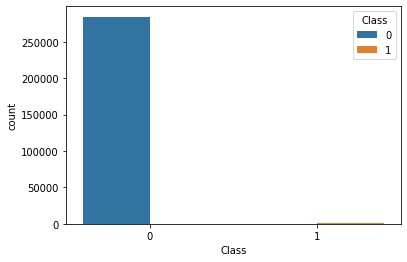

In [ ]:
sns.countplot(x=data.Class, hue=data.Class)

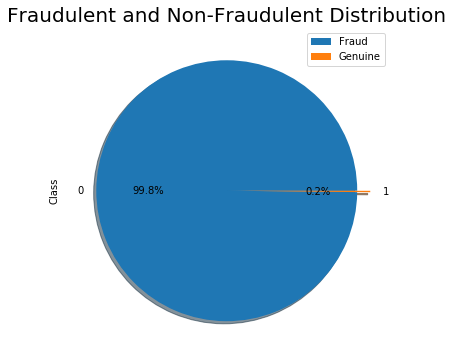

In [ ]:
data.Class.value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"])

In [ ]:
LABELS = ['Genuine', 'Fraud']

Text(0.5, 1.0, 'Transactions Amt Vs Fraud Detection')

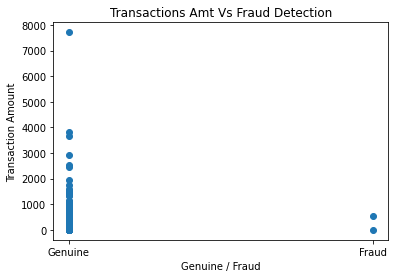

In [ ]:
plt.scatter('Class','Amount',data =data)
plt.xlabel('Genuine / Fraud')
plt.ylabel('Transaction Amount')
plt.xticks(range(2),LABELS)
plt.title('Transactions Amt Vs Fraud Detection')

([<matplotlib.axis.XTick at 0x29900ba8588>,
 <a list of 2 Text xticklabel objects>)

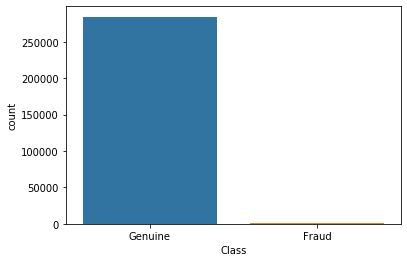

In [ ]:
sns.countplot(data['Class'])
plt.xticks(range(2),LABELS)

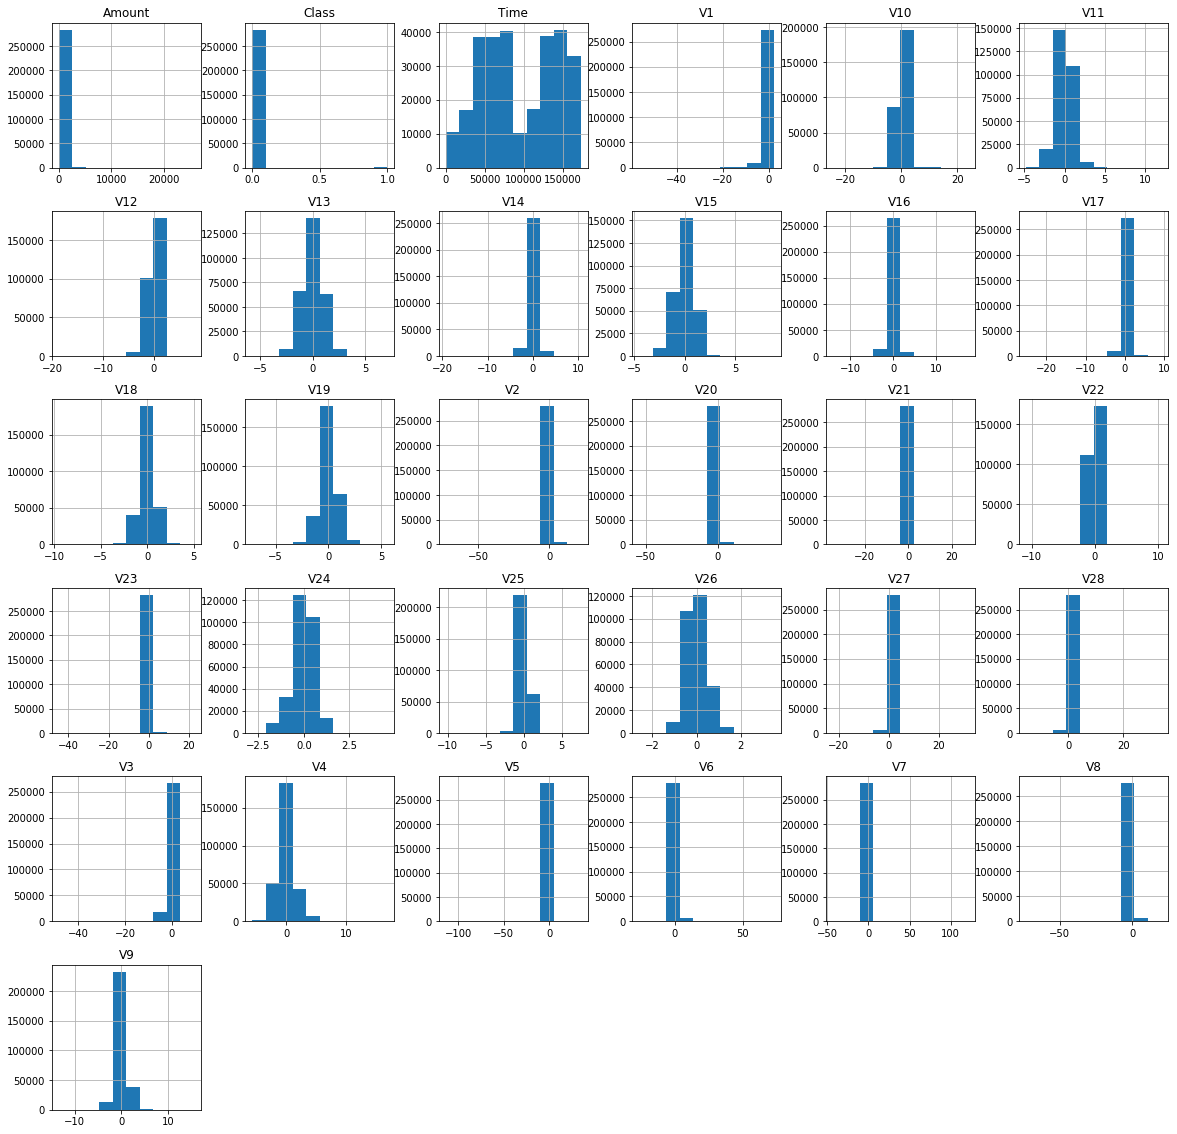

In [ ]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [ ]:
corr =data.corr()

In [ ]:
#corr.values

## Observe The distribution of classes with time 


In [12]:
sns.set(style='darkgrid', palette='colorblind')

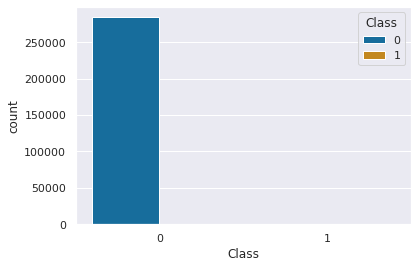

In [13]:
sns.countplot(x=data.Class, hue=data['Class'])

In [14]:
fraud = data[data['Class'] == 1]
genuine = data[data['Class'] == 0]

Text(0.5, 0, 'Second elapsed between the transaction and the first transaction')

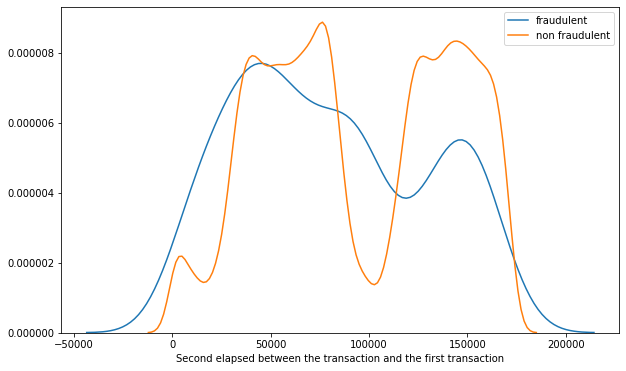

In [ ]:
#distribution plot 

plt.figure(figsize= (10,6))
ax = sns.distplot(fraud['Time'], label ='fraudulent',hist = False)
ax = sns.distplot(genuine['Time'], label = 'non fraudulent' , hist = False)

ax.set_xlabel("Second elapsed between the transaction and the first transaction" )

### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.
Hence, we can drop the Time column.

In [21]:
data.drop('Time',axis = 1  ,inplace = True)

In [8]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

### Observe the distribution of classes with amount 



Text(0.5, 0, 'Transaction_amount')

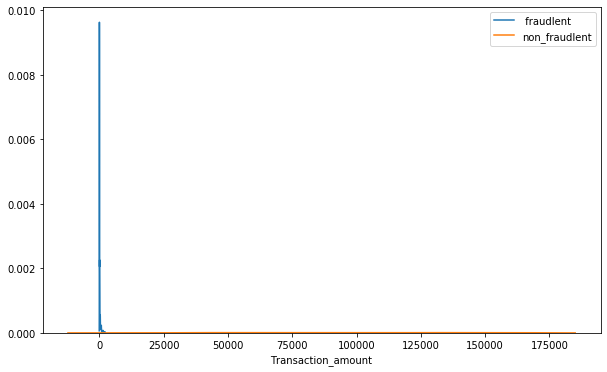

In [ ]:
plt.figure(figsize= (10,6))

ax = sns.distplot(fraud['Amount'] , label =' fraudlent' , hist = False)
ax = sns.distplot(genuine['Time'] , label = 'non_fraudlent' , hist = False)
ax.set_xlabel('Transaction_amount')

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

## Scale the data

In [22]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

scaler = StandardScaler() # object of the class StandardScaler ()
data['Amount_scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [10]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


### Saving preprossed data as serialized files
To deploy the predictive models built we save them along with the required data files as serialized file objects
We save cleaned and processed input data, tuned predictive models as files so that they can later be re-used/shared

In [11]:
import pickle
import os

CreditCardFraudDataCleaned = data

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Data set after all the transformations as a file
with open('CreditCardFraudDataCleaned.pkl', 'wb') as fileWriteStream:
    pickle.dump(CreditCardFraudDataCleaned, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file is saved at Location:',os.getcwd())

OSError: ignored

In [4]:
# Reading a Pickle file
with open('CreditCardFraudDataCleaned.pkl', 'rb') as fileReadStream:
    CreditCardFraudDataFromPickle = pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()
    
# Checking the data read from pickle file. It is exactly same as the DiamondPricesData
data = CreditCardFraudDataFromPickle
data.head()

OSError: ignored

In [23]:
# Separate Target Variable and Predictor Variables
X = data.drop(['Class','Amount'] , axis =1)
y = data['Class']


In [24]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_scaled'],
      dtype='object')

### Train Test Split 

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.3,random_state =101)

In [26]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)


### Class Imbalance
Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. If one applies classifiers on the dataset, they are likely to predict everything as the majority class.
This was often regarded as a problem in learning from highly imbalanced datasets.

Synthetic Minority OverSampling Technique (SMOTE)
In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.



Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN)
ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

### Import imbalace technique algorithims

In [16]:
from imblearn.over_sampling import SMOTE, ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [27]:
from collections import Counter # counter takes values returns value_counts dictionary
print('Original dataset shape %s' % Counter(y_train))


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 199016, 1: 348})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 199016, 1: 199016})


In [25]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [26]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [27]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.97662
AUC : 0.93976
Precision : 0.06149
Recall : 0.90278
F1 : 0.11515


AUC -  0.9397592097601769 



Text(0, 0.5, 'True Positive Rate (Sensitivity)')

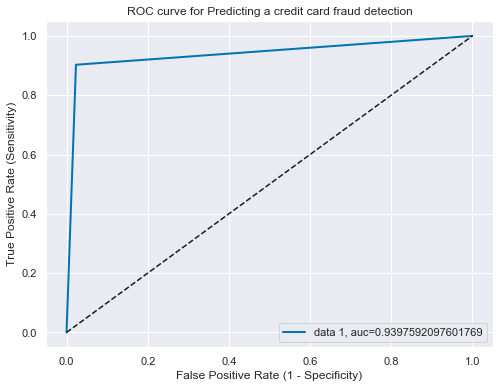

In [ ]:
# plot ROC Curve
sns.set(style='darkgrid', palette='colorblind')
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')


In [ ]:
sns.set(style='darkgrid', palette='colorblind')

f1=0.115


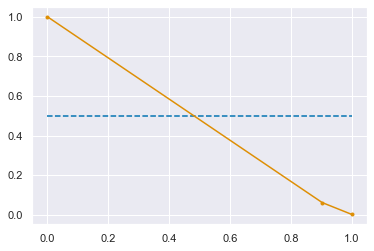

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

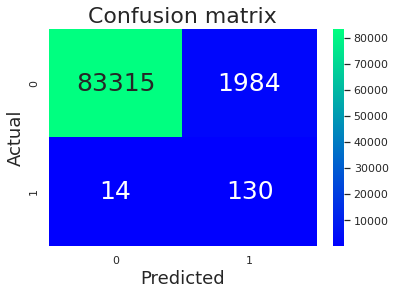

In [28]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [ ]:
# draw confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)

print('Confusion Matrix : \n', cnf_matrix)

Confusion Matrix : 
 [[83315  1984]
 [   14   130]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

rdf_classifier = RandomForestClassifier(random_state = 101)
rdf_classifier.fit(X_train_smote,y_train_smote)
y_pred_smote = rdf_classifier.predict(X_test)

In [ ]:
rdf_classifier.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=101)

In [ ]:
y_pred_smote = rdf_classifier.predict(X_test)

In [ ]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.99951
AUC : 0.91656
Precision : 0.86957
Recall : 0.83333
F1 : 0.85106


AUC -  0.916561155464894 



Text(0, 0.5, 'True Positive Rate (Sensitivity)')

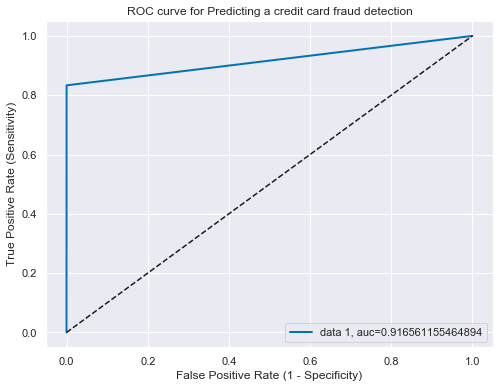

In [ ]:
# plot ROC Curve
sns.set(style='darkgrid', palette='colorblind')
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [ ]:
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

f1=0.851


In [ ]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [ ]:
# draw confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)

print('Confusion Matrix : \n', cnf_matrix)

Confusion Matrix : 
 [[85281    18]
 [   24   120]]


In [ ]:

filename = 'randomforest_model.sav'
pickle.dump(rdf_classifier, open(filename, 'wb')) 

## some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [ ]:
'SVM SMOTE', SVC(gamma='auto'),X_train_smote,y_train_smote,X_test,y_test))

In [31]:
from sklearn.svm import SVC # "Support vector classifier"  
sv_classifier = SVC(gamma = 'auto', random_state=101)  
  


In [14]:
from sklearn.svm import SVC # "Support vector classifier"  
sv_classifier = SVC(kernel='linear')

In [ ]:
sv_classifier.fit(X_train_smote,y_train_smote)

In [19]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_smote,y_train_smote)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred_smote = nb_classifier.predict(X_test)

In [21]:

filename = 'nb_model.sav'
pickle.dump(nb_classifier, open(filename, 'wb')) 

In [22]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.97548
AUC : 0.91839
Precision : 0.05639
Recall : 0.86111
F1 : 0.10585


AUC -  0.9183924586845489 



Text(0, 0.5, 'True Positive Rate (Sensitivity)')

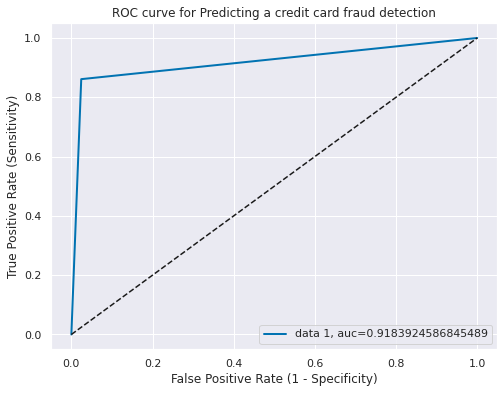

In [23]:
# plot ROC Curve
sns.set(style='darkgrid', palette='colorblind')
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

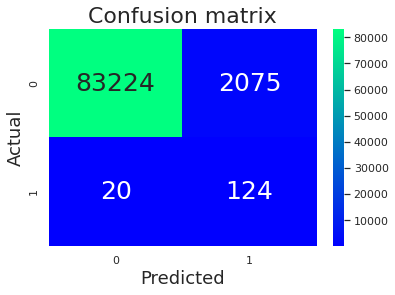

In [24]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [ ]:
KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote,y_train_smote,X_test,y_test))

In [25]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn_classifier= KNeighborsClassifier(n_neighbors=5, p=2 )  
knn_classifier.fit(X_train_smote,y_train_smote)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
#Predicting the test set result  
y_pred_smote= knn_classifier.predict(X_test)  

AUC -  0.9331661029633016 



Text(0, 0.5, 'True Positive Rate (Sensitivity)')

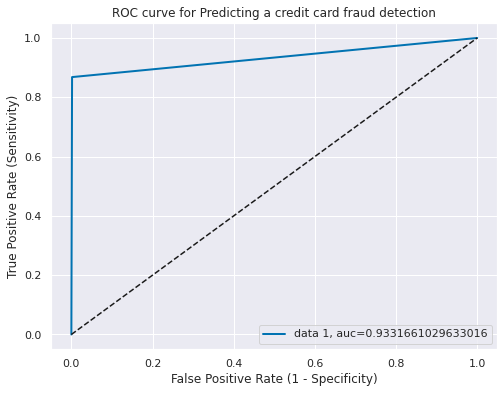

In [31]:
# plot ROC Curve
sns.set(style='darkgrid', palette='colorblind')
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

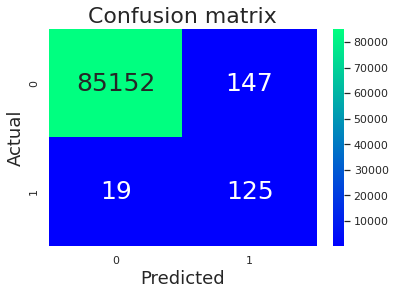

In [30]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [29]:
from sklearn.model_selection import  cross_val_score
from sklearn import metrics
model_list = [('RandomForest Classifier', rdf_classifier),
('Naive Baiye Classifier', bnb_Classifier)] 

models = [j for j in model_list]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_res, y_res, cv=10)
    accuracy = metrics.accuracy_score(y_res, v.predict(X_res))
    confusion_matrix = metrics.confusion_matrix(y_res, v.predict(X_res))
    classification = metrics.classification_report(y_res, v.predict(X_res))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


array([[85152,   147],
       [   19,   125]])

In [28]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 199016, 1: 348})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({1: 199051, 0: 199016})


In [29]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)

In [ ]:
from sklearn.model_selection import  cross_val_score
from sklearn import metrics

scores = cross_val_score(v, X_res, y_res, cv=10)
accuracy = metrics.accuracy_score(y_res, v.predict(X_res))
confusion_matrix = metrics.confusion_matrix(y_res, v.predict(X_res))
classification = metrics.classification_report(y_res, v.predict(X_res))
print('===== {} ====='.format(i))
print()
print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
print() 
print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification) 
print()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

rdf_classifier = RandomForestClassifier(random_state = 101)
rdf_classifier.fit(X_train_adasyn,y_train_adasyn)
y_pred_adasyn = rdf_classifier.predict(X_test)

KeyboardInterrupt: ignored